In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfixest as pf


In [ ]:
# Set working directory
os.chdir("/workspaces/course-materials")

# Load data
ab_data = pd.read_csv("data/ab_data.csv", usecols=["EMP", "WAGE", "W", "N", "K", "YS", "ID", "YEAR", "IND"])

# Data overview
pd.set_option('display.max_columns', None)
ab_data.describe()

,IND,YEAR,EMP,WAGE,N,W,K,YS,ID
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,5.123181,1979.650824,7.891677,23.918803,1.056002,3.142988,-0.441578,4.638015,73.203686
std,2.678095,2.216070,15.934922,5.648418,1.341506,0.263008,1.514132,0.093961,41.233331
min,1.000000,1976.000000,0.104000,8.017100,-2.263364,2.081577,-4.431217,4.464758,1.000000
25%,3.000000,1978.000000,1.180500,20.636450,0.165938,3.027059,-1.509593,4.575716,37.000000
50%,5.000000,1980.000000,2.287000,24.006000,0.827241,3.178304,-0.657780,4.610656,74.000000
75%,8.000000,1981.000000,7.020000,27.493600,1.948761,3.313953,0.406097,4.705946,110.000000
max,9.000000,1984.000000,108.561997,45.231800,4.687321,3.811800,3.852441,4.854880,140.000000


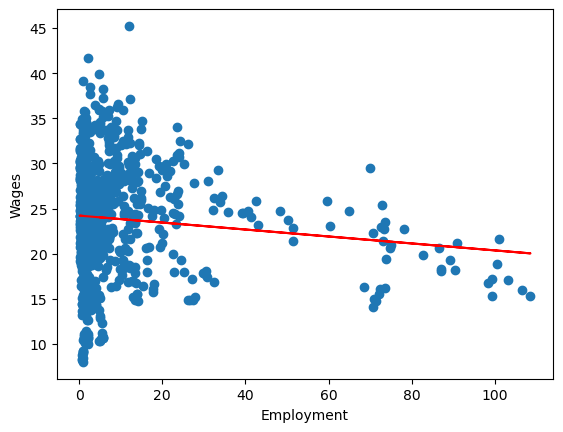

In [6]:
# Scatterplot of W on N
plt.figure()
# Enable interactive mode
plt.ion()
plt.scatter(ab_data["EMP"], ab_data["WAGE"])

# Add linear regression line
m, b = np.polyfit(ab_data["EMP"], ab_data["WAGE"], 1)
plt.plot(ab_data["EMP"], m*ab_data["EMP"] + b, color="red")

plt.xlabel("Employment")
plt.ylabel("Wages")
plt.show()
plt.savefig("outputs/pl1.png")
plt.close()

In [7]:
labels = {
    "EMP": "Employment",
    "WAGE": "Wage",
    "W": "Log wage",
    "N": "Log employment",
    "K": "Log capital",
    "YS": "Log industry output",
    "ID": "Firm",
    "YEAR": "Year",
    "IND": "Industry"
}

In [10]:
# baseline regression
est1 = pf.feols("W ~ N + K + YS | ID + YEAR", data=ab_data, vcov = {'CRV1':'ID'})
est1.summary()

###

Estimation:  OLS
Dep. var.: W, Fixed effects: ID+YEAR
Inference:  CRV1
Observations:  1031

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| N             |     -0.107 |        0.049 |    -2.179 |      0.031 | -0.203 |  -0.010 |
| K             |      0.057 |        0.032 |     1.808 |      0.073 | -0.005 |   0.120 |
| YS            |      0.219 |        0.068 |     3.216 |      0.002 |  0.084 |   0.353 |
---
RMSE: 0.071 R2: 0.928 R2 Within: 0.05 


In [9]:
pf.etable(est1, signif_code=[0.01, 0.05, 0.1], show_se_type=False, labels=labels)

GT(_tbl_data=  level_0              level_1                      0
0    coef       Log employment  -0.107** <br> (0.049)
1    coef          Log capital    0.057* <br> (0.032)
2    coef  Log industry output  0.219*** <br> (0.068)
3      fe                 Year                      x
4      fe                 Firm                      x
5   stats         Observations                   1031
6   stats        R<sup>2</sup>                  0.928, _body=<great_tables._gt_data.Body object at 0x71a5929d3fe0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x71a5929d3620>, _spanners=Spanners([SpannerInfo(spanner_id='Log wage', spanner_level=1, spanner_label='Log wage', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x71a5929d13d0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_l

In [11]:
# sensitivity to fixed effects specifications
est2 = pf.feols("W ~ N + K + YS | csw0(ID, YEAR)", data=ab_data, vcov = {'CRV1':'ID'})
pf.etable(est2, signif_code=[0.01, 0.05, 0.1], show_se_type=False, labels=labels)

GT(_tbl_data=  level_0              level_1                      0                       1  \
0    coef       Log employment  -0.083** <br> (0.040)  -0.134*** <br> (0.050)   
1    coef          Log capital   0.077** <br> (0.033)      0.028 <br> (0.033)   
2    coef  Log industry output     0.092 <br> (0.101)     -0.044 <br> (0.068)   
3    coef            Intercept  2.836*** <br> (0.494)                           
4      fe                 Year                      -                       -   
5      fe                 Firm                      -                       x   
6   stats         Observations                   1031                    1031   
7   stats        R<sup>2</sup>                  0.035                   0.909   

                       2  
0  -0.107** <br> (0.049)  
1    0.057* <br> (0.032)  
2  0.219*** <br> (0.068)  
3                         
4                      x  
5                      x  
6                   1031  
7                  0.928  , _body=<great_tables._gt_data.Body object at 0x71a592ff37a0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x71a592ff1fa0>, _spanners=Spanners([SpannerInfo(spanner_id='Log wage', spanner_level=1, spanner_label='Log wage', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x71a592ff3080>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'),

In [12]:
# heterogeneity analysis via subsamples
est3 = pf.feols("W ~ N + K + YS | ID + YEAR", data=ab_data, vcov = {'CRV1':'ID'}, split = "IND")
pf.etable(est3, signif_code=[0.01, 0.05, 0.1], show_se_type=False, labels=labels)

GT(_tbl_data=  level_0              level_1                    0                      1  \
0    coef       Log employment  -0.093 <br> (0.088)  -0.411** <br> (0.189)   
1    coef          Log capital   0.053 <br> (0.031)   0.358** <br> (0.154)   
2    coef  Log industry output  -1.321 <br> (1.699)     0.191 <br> (0.482)   
3      fe                 Year                    x                      x   
4      fe                 Firm                    x                      x   
5   stats         Observations                  124                    117   
6   stats        R<sup>2</sup>                0.983                  0.846   

                      2                      3                    4  \
0   -0.091 <br> (0.068)    -0.162 <br> (0.149)  -0.016 <br> (0.050)   
1  0.100** <br> (0.037)     0.096 <br> (0.132)   0.043 <br> (0.050)   
2   -0.155 <br> (0.286)  0.775*** <br> (0.173)  -0.071 <br> (0.264)   
3                     x                      x                    x   
4                     x                      x                    x   
5                    89                    122                  157   
6                 0.935                  0.854                0.905   

                     5                    6                    7  \
0  -0.089 <br> (0.087)   0.011 <br> (0.062)   0.119 <br> (0.072)   
1   0.078 <br> (0.049)  -0.028 <br> (0.060)   0.030 <br> (0.103)   
2  -0.184 <br> (0.254)  -0.580 <br> (0.500)  -1.025 <br> (0.667)   
3                    x                    x                    x   
4                    x                    x                    x   
5                  206                   92                   36   
6                0.882                0.945                0.912   

                     8  
0  -0.052 <br> (0.148)  
1   0.030 <br> (0.093)  
2  -0.151 <br> (0.258)  
3                    x  
4                    x  
5                   88  
6                0.641  , _body=<great_tables._gt_data.Body object at 0x71a5937dbfe0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='4', type=<ColInfoTypeEnum.default: 1>, column_label='(5)', column_align='center', column_width=None), ColInfo(var='5', type=<ColInfoTypeEnum.default: 1>, column_label='(6)', column_align='center', column_width=None), ColInfo(var='6', type=<ColInfoTypeEnum.default: 1>, column_label='(7)', column_align='center', column_width=None), ColInfo(var='7', type=<ColInfoTypeEnum.default: 1>, column_label='(8)', column_align='center', column_width=None), ColInfo(var='8', type=<ColInfoTypeEnum.default: 1>, column_label='(9)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x71a592a59700>, _spanners=Spanners([SpannerInfo(spanner_id='Log wage', spanner_level=1, spanner_label='Log wage', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3', '4', '5', '6', '7', '8'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x71a592a5b920>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='valu

In [ ]:
# robustness - subset sample for firms in 1980s
est4 = pf.feols("W ~ N + K + YS | ID + YEAR", data=ab_data.query('YEAR >= 1980'), vcov = {'CRV1':'ID'})
pf.etable(est4, signif_code=[0.01, 0.05, 0.1], show_se_type=False, labels=labels)

GT(_tbl_data=  level_0              level_1                      0
0    coef       Log employment  -0.209** <br> (0.080)
1    coef          Log capital   0.116** <br> (0.046)
2    coef  Log industry output     0.020 <br> (0.110)
3      fe                 Year                      x
4      fe                 Firm                      x
5   stats         Observations                    533
6   stats        R<sup>2</sup>                  0.950, _body=<great_tables._gt_data.Body object at 0x71a593382ed0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x71a592a5ad50>, _spanners=Spanners([SpannerInfo(spanner_id='Log wage', spanner_level=1, spanner_label='Log wage', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x71a592a5b0e0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_l